In [1]:
import pandas as pd
import numpy as np
import csv
import sys
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", delim_whitespace=True,  
                 decimal = ".", header=None, names=["mpg", "cylinders","displacement","horsepower","weight",
                      "acceleration","modelYear","origin","carName"])

In [2]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,origin,carName
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
modelYear         int64
origin            int64
carName          object
dtype: object

In [4]:
df[pd.to_numeric(df['horsepower'], errors='coerce').isnull()].loc[:,'horsepower']

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: horsepower, dtype: object

In [5]:
df.loc[:,('cylinders','origin','modelYear')] = df.loc[:,('cylinders','origin','modelYear')].astype('str')

In [6]:
df1 = df[pd.to_numeric(df['horsepower'], errors='coerce').notnull()].copy()

In [7]:
df1.loc[:,('horsepower')] = df1.loc[:,('horsepower')].astype('float')

In [8]:
df1.dtypes

mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
modelYear        object
origin           object
carName          object
dtype: object

In [9]:
df1.describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


In [10]:
numCol = df1.loc[:, df1.dtypes != object].columns
numCols = [df1.columns.get_loc(c) for c in df1.columns if c in numCol]
print(numCol)

Index([u'mpg', u'displacement', u'horsepower', u'weight', u'acceleration'], dtype='object')


In [11]:
stringCol = df1.loc[:, df1.dtypes == object].columns
stringCols = [df1.columns.get_loc(c) for c in df1.columns if c in stringCol]
print(stringCol)

Index([u'cylinders', u'modelYear', u'origin', u'carName'], dtype='object')


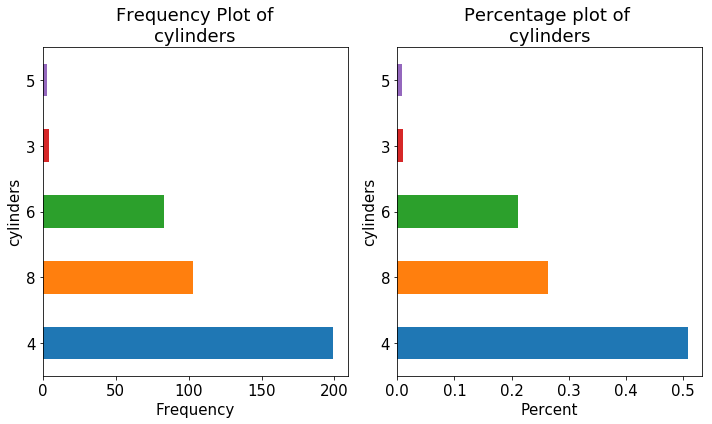

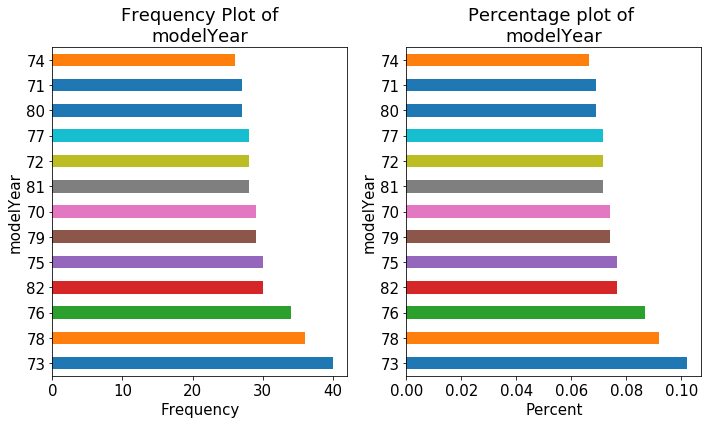

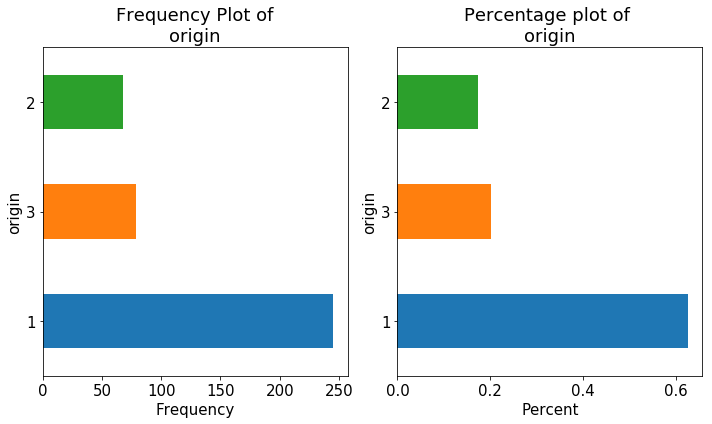

In [12]:
j = 0
for i in stringCols[:3]: 
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.subplot(1,2,1)
    barChart = df1.iloc[:,i].value_counts().plot(kind='barh') 
    barChart.set_title("Frequency Plot of\n" + list(stringCol)[j], fontsize=18) # title and font size
    barChart.set_ylabel(list(stringCol)[j], fontsize=15)
    barChart.set_xlabel("Frequency", fontsize=15) # x label and font size
    barChart.tick_params(labelsize = 15) # ticks font size
    plt.subplot(1,2,2)
    percChart = (df1.iloc[:,i].value_counts()/392).plot(kind='barh') 
    percChart.set_title("Percentage plot of \n" + list(stringCol)[j], fontsize=18)
    percChart.set_ylabel(list(stringCol)[j], fontsize=15)
    percChart.set_xlabel("Percent", fontsize=15)
    percChart.tick_params(labelsize = 15)
    plt.tight_layout()
    plt.savefig("auto_mpg" + str(i) +".png") 
    plt.show()
    j = j + 1

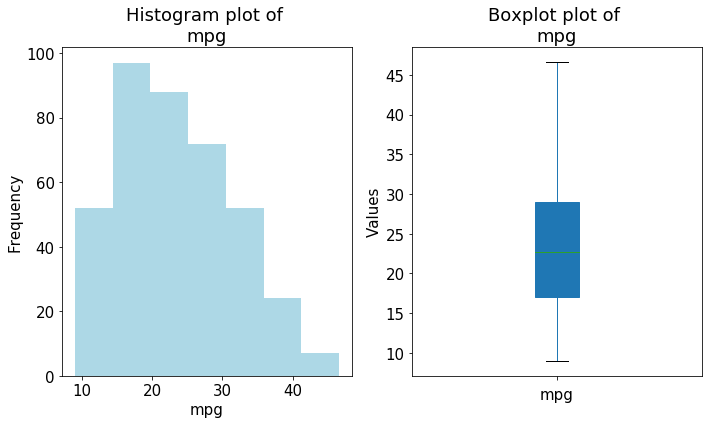

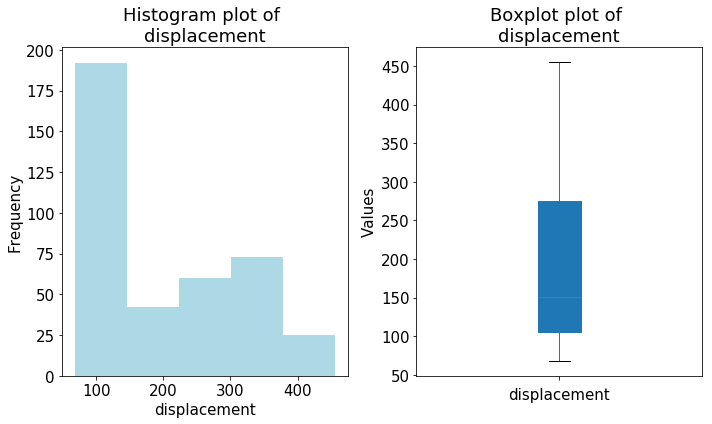

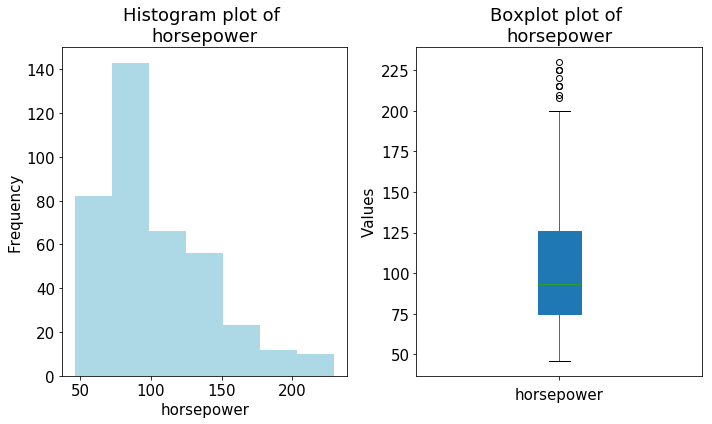

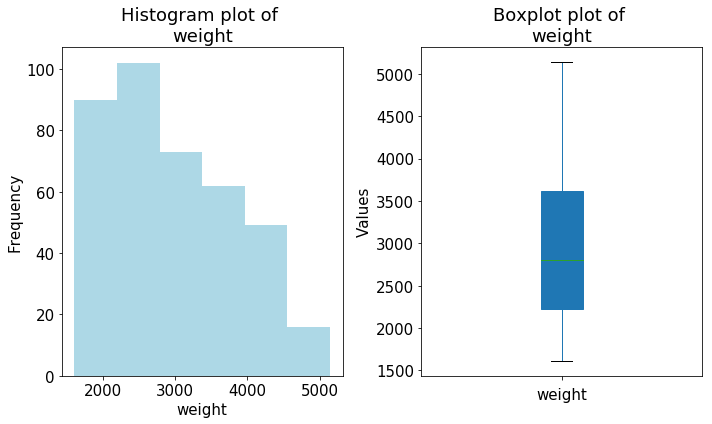

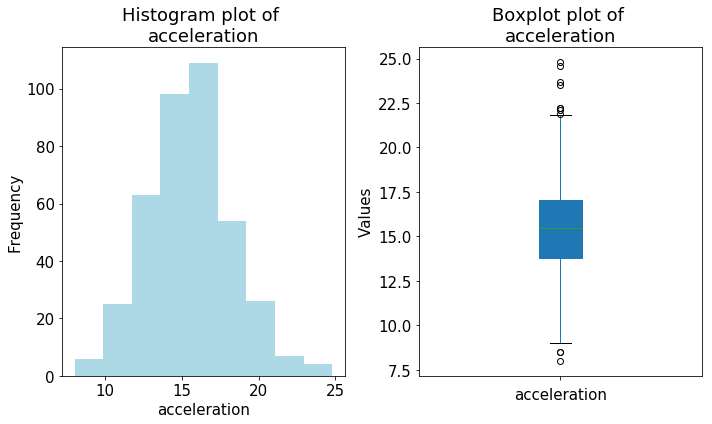

In [13]:
j = 0
for i in numCols:
    binVal = int((df1.iloc[:,i].max() - df1.iloc[:,i].min())/(df1.iloc[:,i].std()/1.5))
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.subplot(1,2,1)
    histChart = df1.iloc[:,i].plot(kind='hist', bins = binVal, color = 'lightblue')
    histChart.set_title("Histogram plot of \n" + list(numCol)[j], fontsize=18)
    histChart.set_xlabel(list(numCol)[j], fontsize=15)
    histChart.set_ylabel("Frequency", fontsize=15)
    histChart.tick_params(labelsize = 15)
    plt.subplot(1,2,2)
    boxChart = df1.iloc[:,i].plot(kind='box',patch_artist=True)
    boxChart.set_xticklabels([])
    boxChart.set_title("Boxplot plot of \n" + list(numCol)[j], fontsize=18)
    boxChart.set_xlabel(list(numCol)[j], fontsize=15)
    boxChart.set_ylabel("Values", fontsize=15)
    boxChart.tick_params(labelsize = 15)
    plt.tight_layout()
    plt.savefig("auto_mpg" + str(i) +".png")
    plt.show()
    j = j + 1

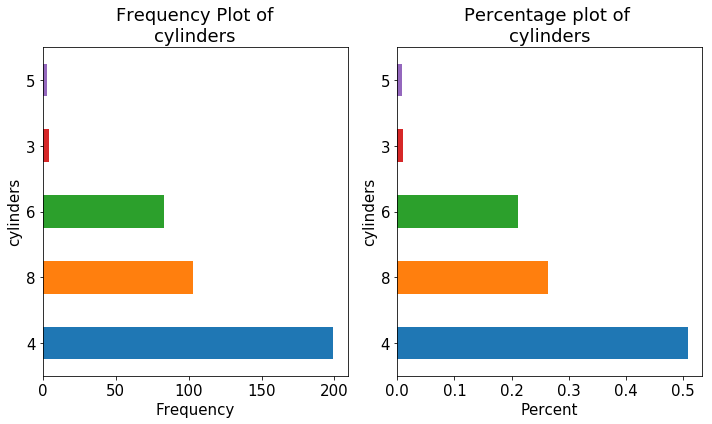

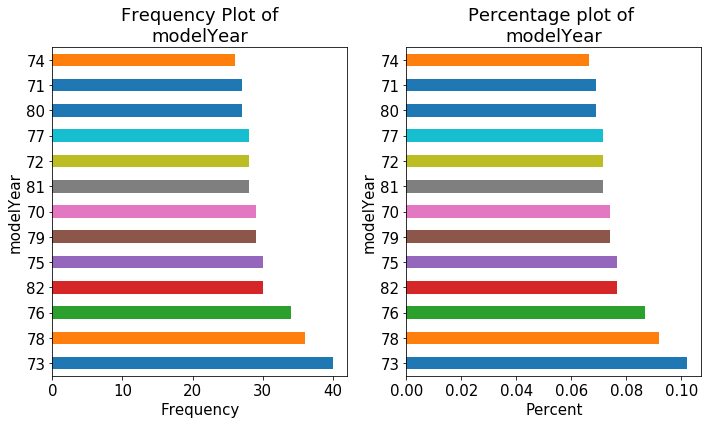

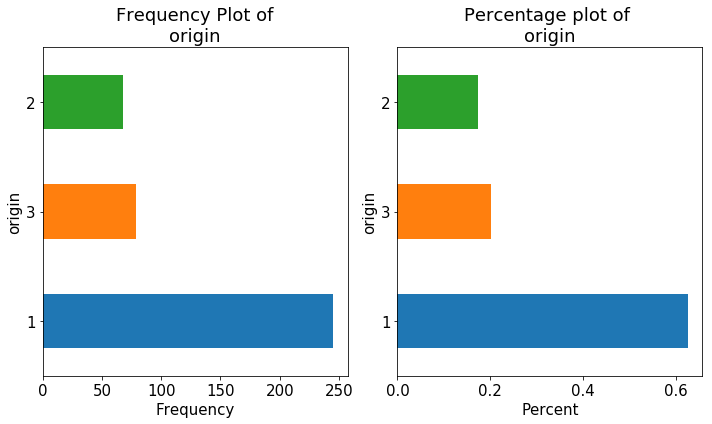

In [14]:
j = 0
for i in stringCols[:3]: 
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.subplot(1,2,1)
    barChart = df1.iloc[:,i].value_counts().plot(kind='barh') 
    barChart.set_title("Frequency Plot of\n" + list(stringCol)[j], fontsize=18) # title and font size
    barChart.set_ylabel(list(stringCol)[j], fontsize=15)
    barChart.set_xlabel("Frequency", fontsize=15) # x label and font size
    barChart.tick_params(labelsize = 15) # ticks font size
    plt.subplot(1,2,2)
    percChart = (df1.iloc[:,i].value_counts()/392).plot(kind='barh') 
    percChart.set_title("Percentage plot of \n" + list(stringCol)[j], fontsize=18)
    percChart.set_ylabel(list(stringCol)[j], fontsize=15)
    percChart.set_xlabel("Percent", fontsize=15)
    percChart.tick_params(labelsize = 15)
    plt.tight_layout()
    plt.savefig("auto_mpg" + str(i) +".png") 
    plt.show()
    j = j + 1

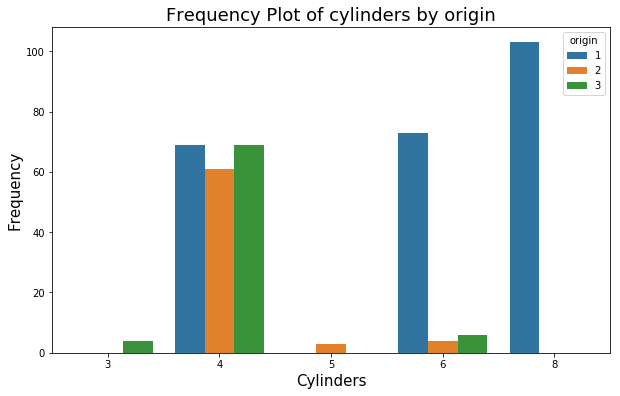

In [15]:
ax = sns.countplot(x="cylinders", hue="origin", data=df1)
ax.set_title("Frequency Plot of cylinders by origin", fontsize=18) # title and font size
ax.set_xlabel("Cylinders", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15) # x label and font sizeplt.title()
plt.savefig("auto_mpg_OriginCylinder.png") 
plt.show()

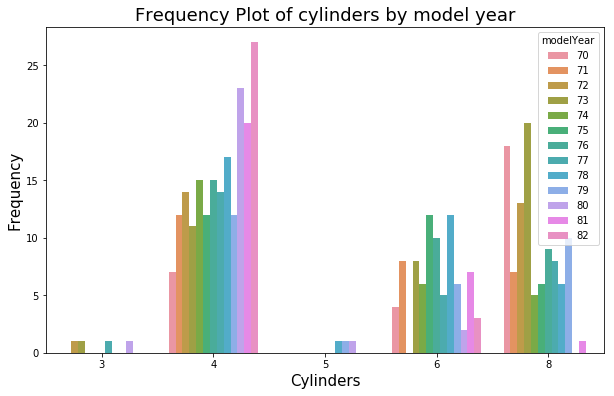

In [16]:
ax = sns.countplot(x="cylinders", hue="modelYear", data=df1)
ax.set_title("Frequency Plot of cylinders by model year", fontsize=18) # title and font size
ax.set_xlabel("Cylinders", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15) # x label and font sizeplt.title()
plt.savefig("auto_mpg_YearCylinder.png") 
plt.show()

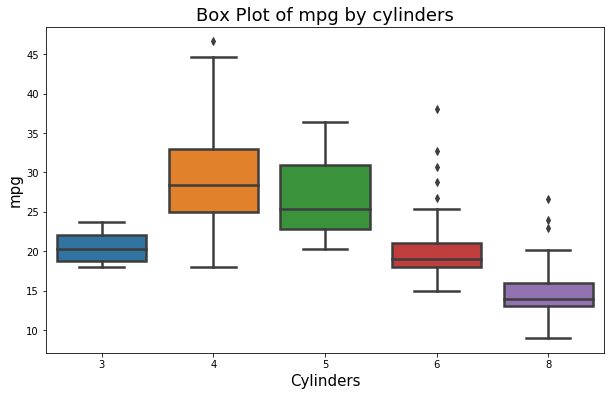

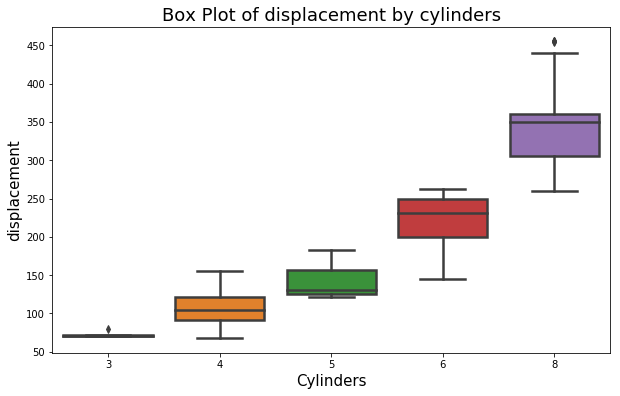

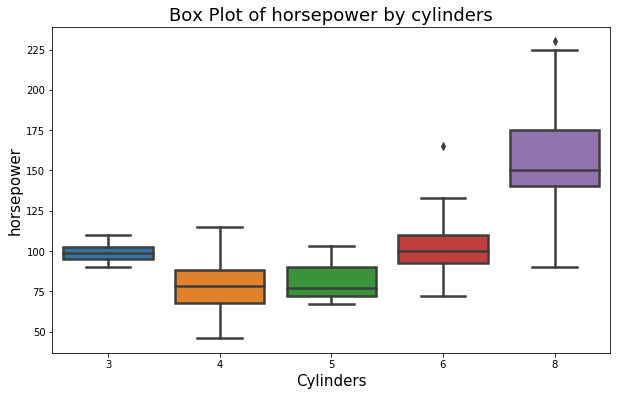

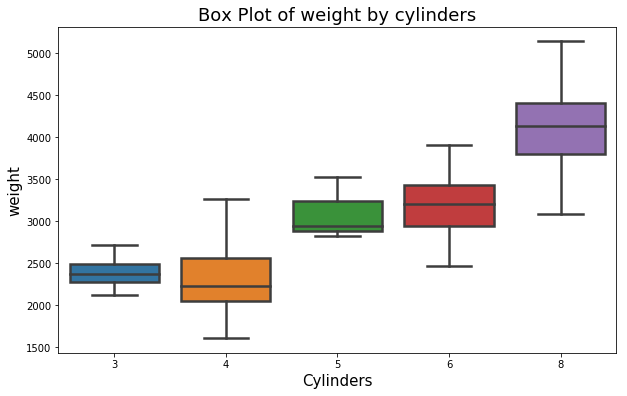

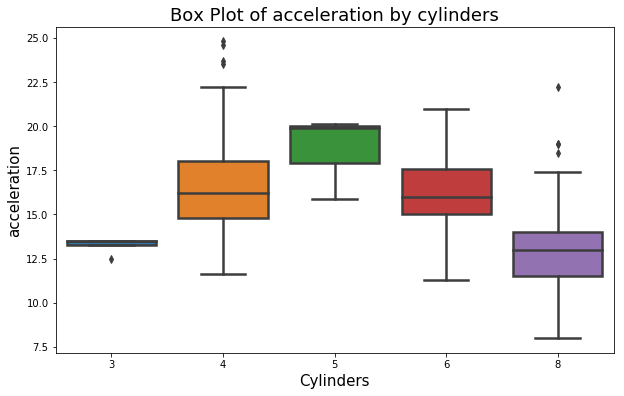

In [17]:
for i in list(numCol):
    ax = sns.boxplot(y=i, x ="cylinders", data=df1,linewidth=2.5)
    ax.set_title("Box Plot of " + i + " by cylinders", fontsize=18) # title and font size
    ax.set_xlabel("Cylinders", fontsize=15)
    ax.set_ylabel(i, fontsize=15) # x label and font sizeplt.title()
    plt.savefig("auto_mpg_"+i+".png") 
    plt.show()

In [18]:
df2 = df1.loc[:,('mpg','displacement','weight','acceleration')].copy()

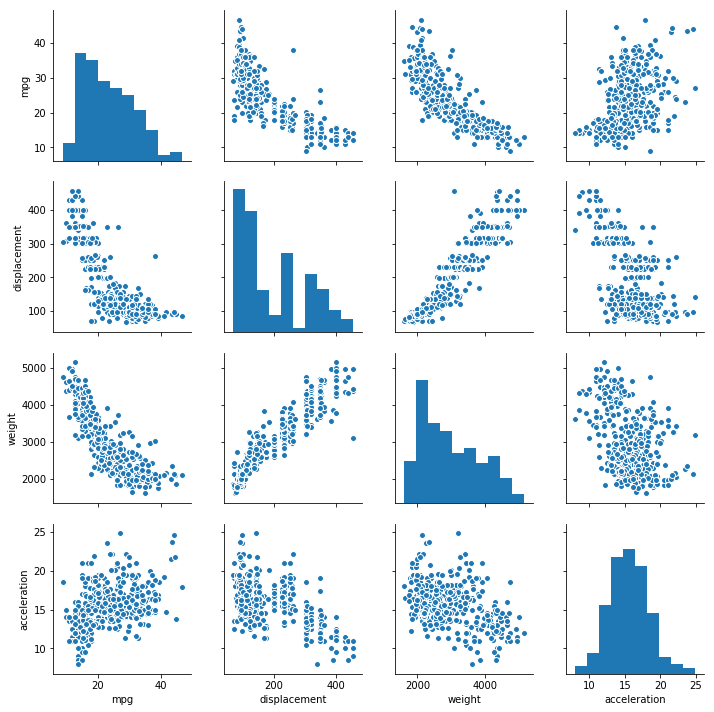

In [19]:
sns.pairplot(df2)
plt.savefig("auto_mpg_pairPlot.png") 
plt.show()

In [20]:
df2.describe() # No negative values in mpg hence ok for boxcox transformation

,mpg,displacement,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,2977.584184,15.541327
std,7.805007,104.644004,849.402560,2.758864
min,9.000000,68.000000,1613.000000,8.000000
25%,17.000000,105.000000,2225.250000,13.775000
50%,22.750000,151.000000,2803.500000,15.500000
75%,29.000000,275.750000,3614.750000,17.025000
max,46.600000,455.000000,5140.000000,24.800000


In [21]:
from scipy.stats import boxcox, boxcox_normmax
from sklearn import preprocessing
df3 = df2.copy()
for i in range(0,4):
    value = boxcox_normmax(df3.iloc[:,i], brack=(-1.9, 2.0),  method='mle')
    df3.iloc[:,i] = (df3.iloc[:,i]**value - 1)/value
    df3.iloc[:,i] = preprocessing.scale(df3.iloc[:,i])

In [22]:
df3.describe()

,mpg,displacement,weight,acceleration
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-3.092764e-16,-7.083336e-16,-7.937457e-15,8.621222e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-2.474971e+00,-1.890849e+00,-2.198716e+00,-3.089796e+00
25%,-7.952452e-01,-8.855535e-01,-8.910311e-01,-6.173912e-01
50%,4.504325e-02,-1.362837e-01,-2.990547e-02,2.482862e-02
75%,7.820243e-01,9.421767e-01,8.485973e-01,5.663935e-01
max,2.324395e+00,1.712181e+00,1.956005e+00,3.042669e+00


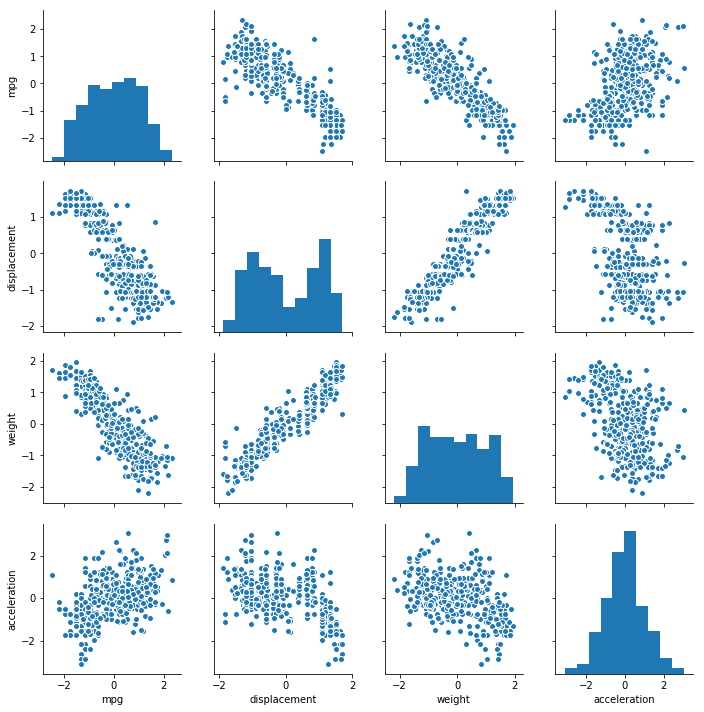

In [23]:
sns.pairplot(df3)
plt.savefig("auto_mpg_pairPlotTrans.png") 
plt.show()

In [24]:
df3.corr()

,mpg,displacement,weight,acceleration
mpg,1.000000,-0.852084,-0.868520,0.452553
displacement,-0.852084,1.000000,0.942674,-0.494388
weight,-0.868520,0.942674,1.000000,-0.407256
acceleration,0.452553,-0.494388,-0.407256,1.000000


In [25]:
for i in list(numCol): 
    if(i != 'horsepower'):# We have no null values after transformation
        print(df3[df3[i].isnull()].loc[:,i])


Series([], Name: mpg, dtype: float64)
Series([], Name: displacement, dtype: float64)
Series([], Name: weight, dtype: float64)
Series([], Name: acceleration, dtype: float64)


In [26]:
df3.describe()

,mpg,displacement,weight,acceleration
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-3.092764e-16,-7.083336e-16,-7.937457e-15,8.621222e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-2.474971e+00,-1.890849e+00,-2.198716e+00,-3.089796e+00
25%,-7.952452e-01,-8.855535e-01,-8.910311e-01,-6.173912e-01
50%,4.504325e-02,-1.362837e-01,-2.990547e-02,2.482862e-02
75%,7.820243e-01,9.421767e-01,8.485973e-01,5.663935e-01
max,2.324395e+00,1.712181e+00,1.956005e+00,3.042669e+00


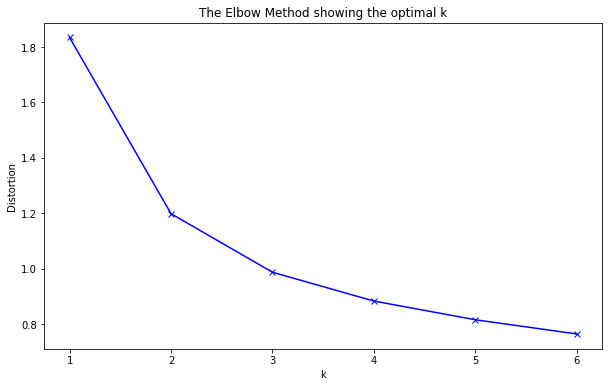

In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = range(1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=14).fit(df3)
    kmeanModel.fit(df3)
    distortions.append(sum(np.min(cdist(df3, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df3.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig("auto_mpg_ElbowKmeans.png") 
plt.show()

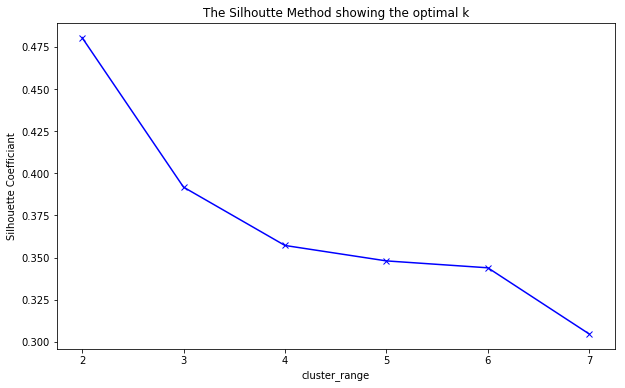

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score
K = range(2,8)
coefVal = []
for k in K:
      clusterer = KMeans(n_clusters=k, random_state=14)
      fit = clusterer.fit_predict( df3 )
      silhouette_avg = silhouette_score(df3, fit)
      coefVal.append(silhouette_avg)
plt.plot(K, coefVal, 'bx-')
plt.xlabel('cluster_range')
plt.ylabel('Silhouette Coefficiant')
plt.title('The Silhoutte Method showing the optimal k')
plt.savefig("auto_mpg_SilhoutteKmeans.png") 
plt.show()

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state=14)
kmeans = kmeans.fit(df3)
df_kmeans = df3.copy()
df_kmeans['cluster'] = kmeans.predict(df3)

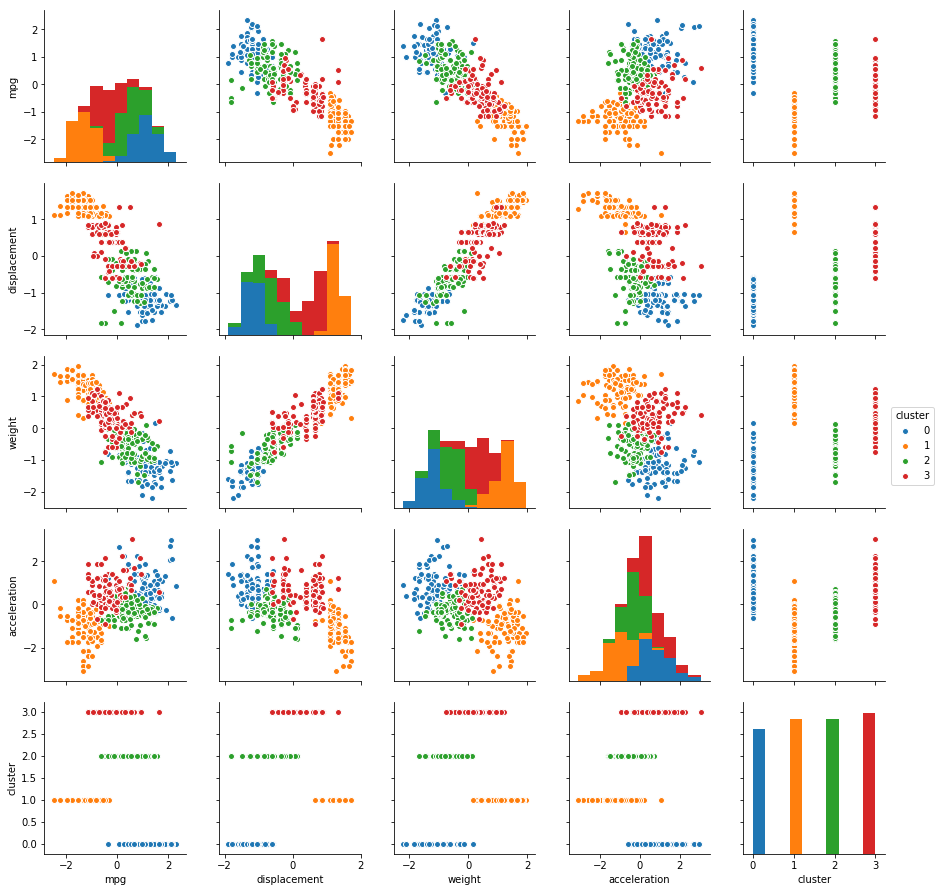

In [30]:
sns.pairplot(df_kmeans, hue='cluster')
plt.savefig("auto_mpg_pairPlotKmeansTrans.png") 
plt.show()

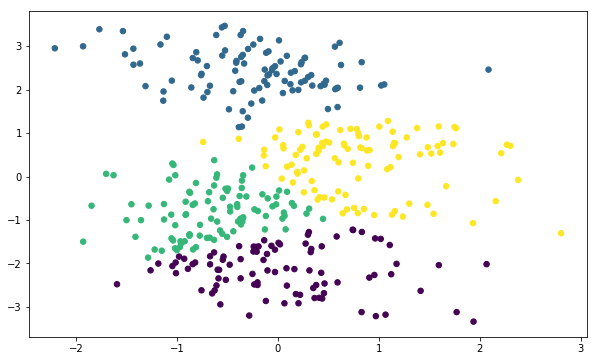

In [31]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)
plot_columns = pca.fit_transform(df_kmeans.iloc[:,0:4])
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_kmeans["cluster"], s=30)
plt.savefig("auto_mpg_ScatterPCA.png") 
plt.show()

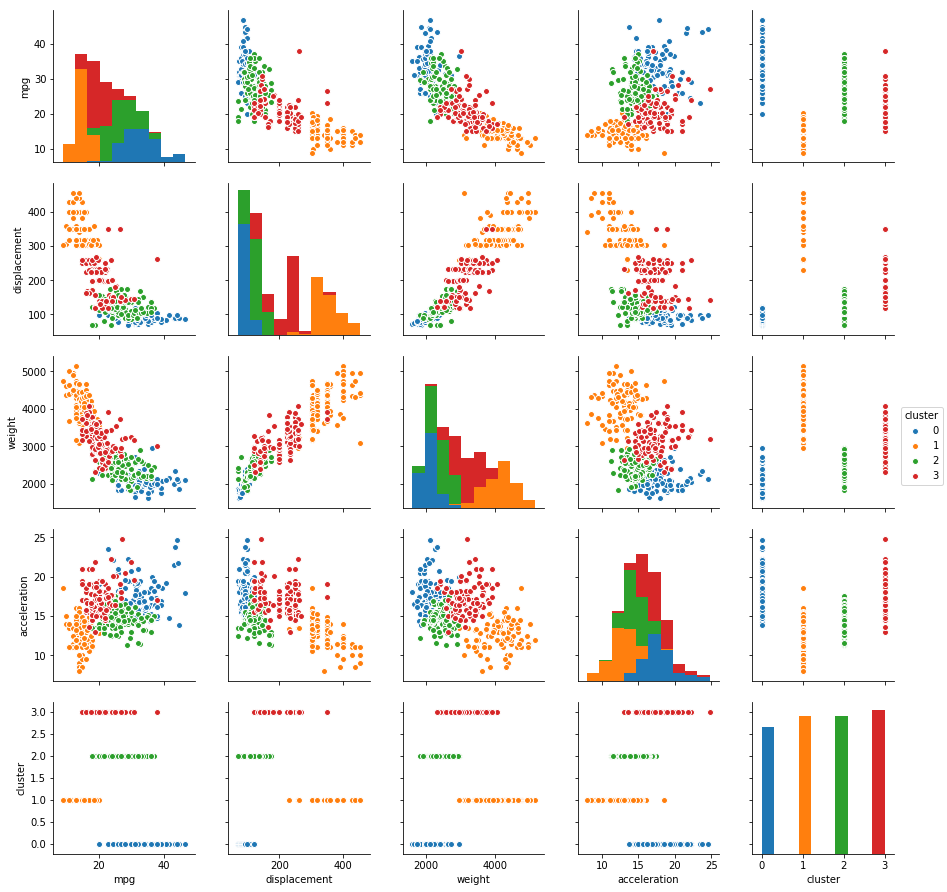

In [32]:
df_untr = df2.copy()
df_untr['cluster'] = df_kmeans['cluster']
sns.pairplot(df_untr, hue='cluster')
plt.savefig("auto_mpg_pairPlotKmeansUntrans.png") 
plt.show()

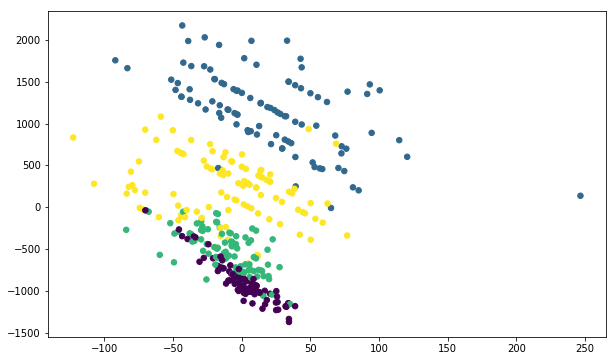

In [33]:
plot_columns = pca.fit_transform(df_untr.iloc[:,0:4])
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_untr["cluster"], s=30)
plt.savefig("auto_mpg_ScatterPCAUntr.png") 
plt.show()

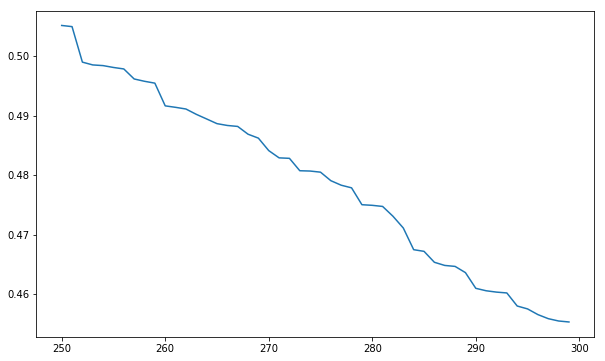

In [34]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors().fit(df3)
distances, indices = nbrs.kneighbors(df3,20)
kDis = distances[:,10]
kDis.sort()
kDis = kDis[range(len(kDis)-1, 0, -1)]
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(range(250,300), kDis[250:300])
plt.savefig("auto_mpg_KNN.png") 
plt.show()


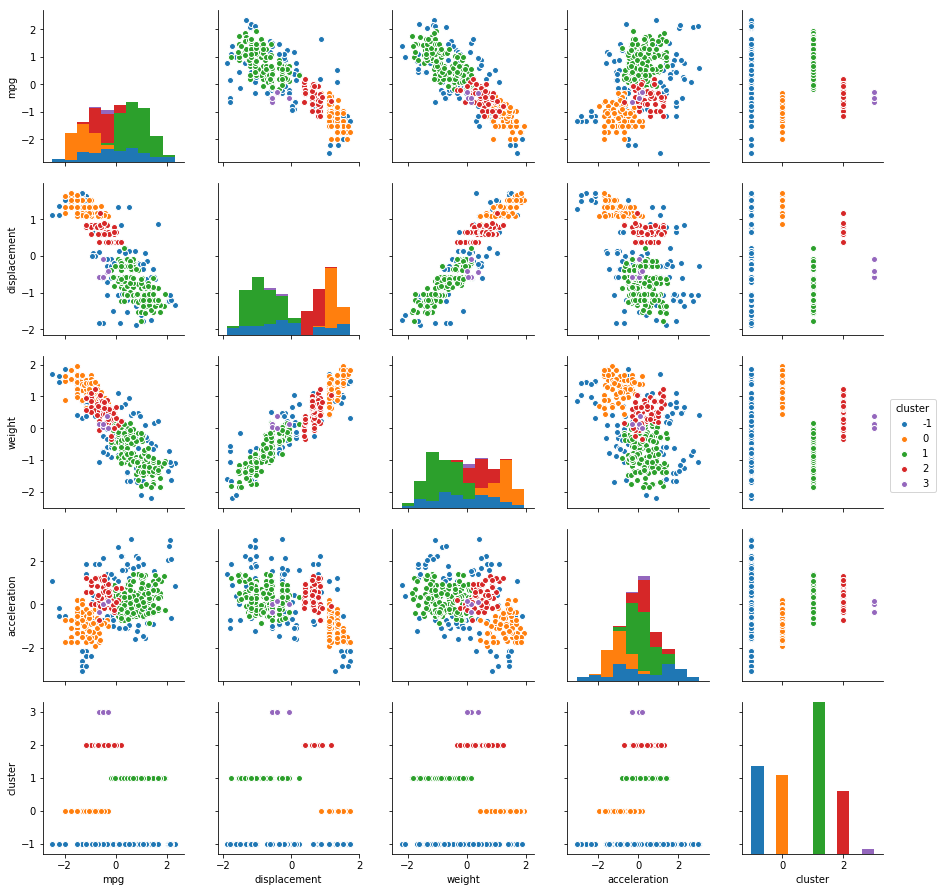

In [35]:
from sklearn.cluster import DBSCAN
df_dbs = df3.copy()
dbScan = DBSCAN(eps=0.468)
fit = dbScan.fit(df3)
df_dbs['cluster'] = fit.labels_
sns.pairplot(df_dbs, hue='cluster')
plt.savefig("auto_mpg_pairPlotDBS.png") 
plt.show()

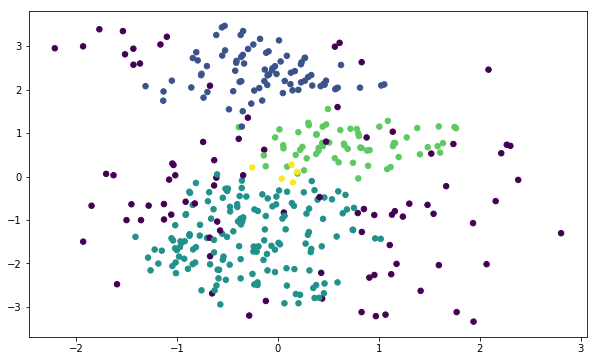

In [36]:
plot_columns = pca.fit_transform(df_dbs.iloc[:,0:4])
plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_dbs["cluster"], s=30)
plt.savefig("auto_mpg_scatterDBSTr.png") 
plt.show()

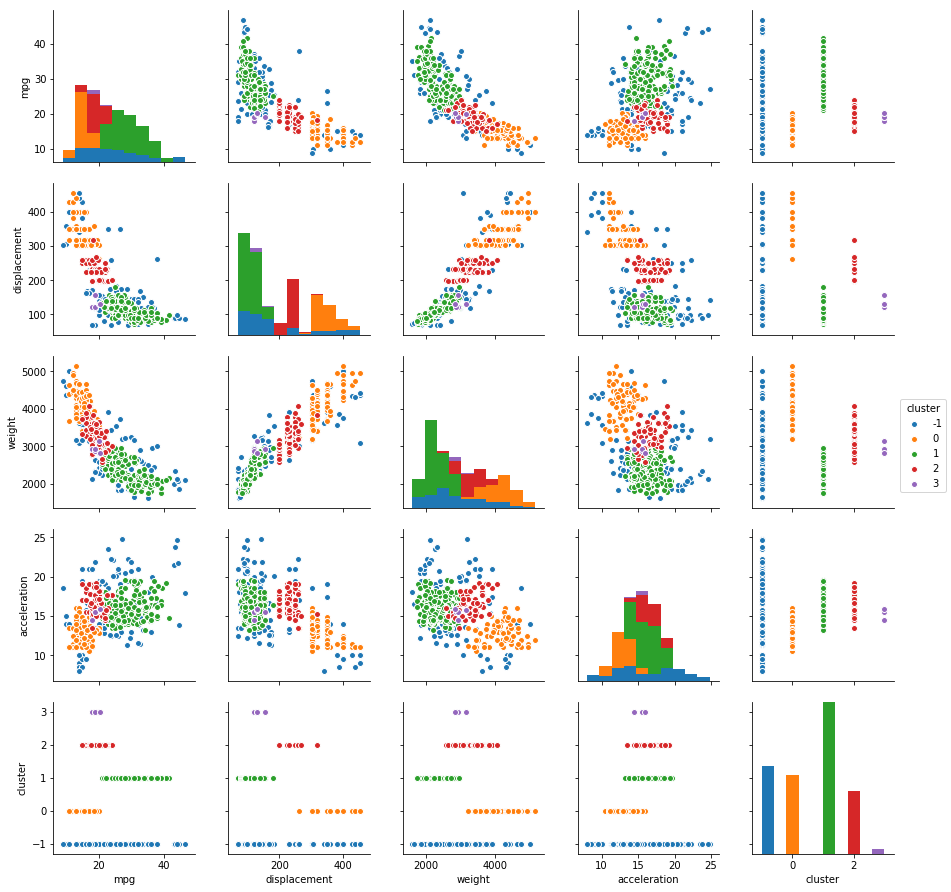

In [37]:
df_untr2 = df2.copy()
df_untr2['cluster'] = df_dbs['cluster']
sns.pairplot(df_untr2, hue='cluster')
plt.savefig("auto_mpg_pairPlotDBSUntr.png") 
plt.show()

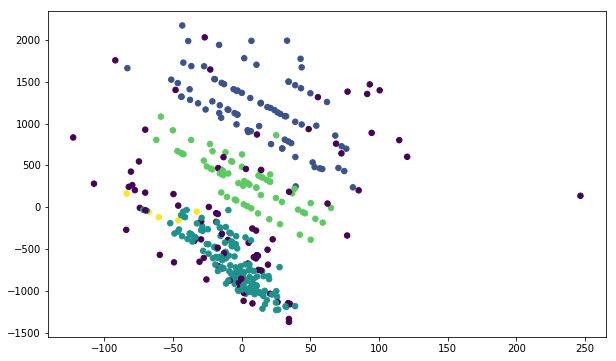

In [38]:
plot_columns = pca.fit_transform(df_untr2.iloc[:,0:4])
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_untr2["cluster"], s=30)
plt.savefig("auto_mpg_ScatterPCADBSUntr.png") 
plt.show()

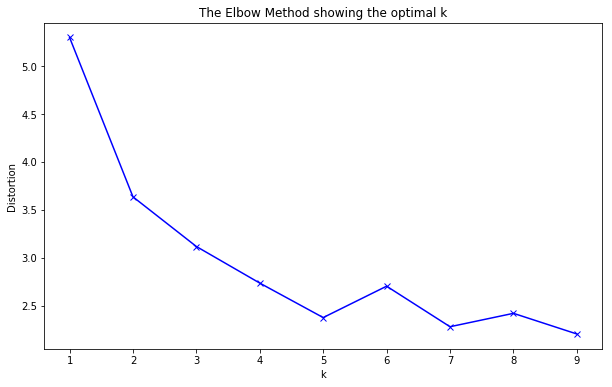

In [39]:
from kmodes import kmodes
from kmodes import kmodes
df_6 = df3.copy()

df6_Cat = df1.loc[:,('origin','modelYear')].copy()
df6 = pd.concat([df6_Cat, df_6], axis=1)

distortionsModes = []
K = range(1,10)
for k in K:
    kmodesModel = kmodes.KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    kmodesModel.fit(df6)
    distortionsModes.append(sum(np.min(cdist(df6, kmodesModel.cluster_centroids_, 'euclidean'), axis=1)) / df6.shape[0])
 
# Plot the elbow
plt.plot(K, distortionsModes, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig("auto_mpg_elbowKmodes.png") 
plt.show()

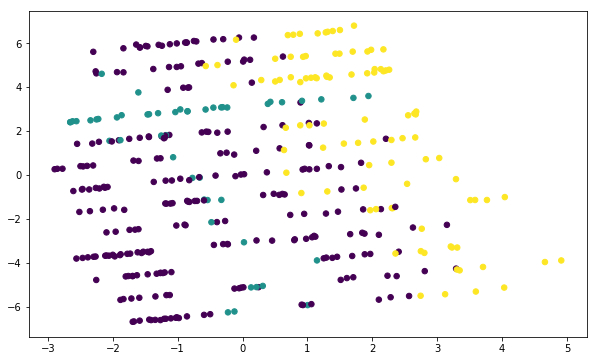

In [40]:
km = kmodes.KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)
clusters = km.fit_predict(df6)
df_kmodes = df6.copy()
df_kmodes['cluster'] = clusters
plot_columns = pca.fit_transform(df_kmodes.iloc[:,0:7])
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_kmodes["cluster"], s=30)
plt.savefig("auto_mpg_ScatterPCATrKmeans.png") 
plt.show()


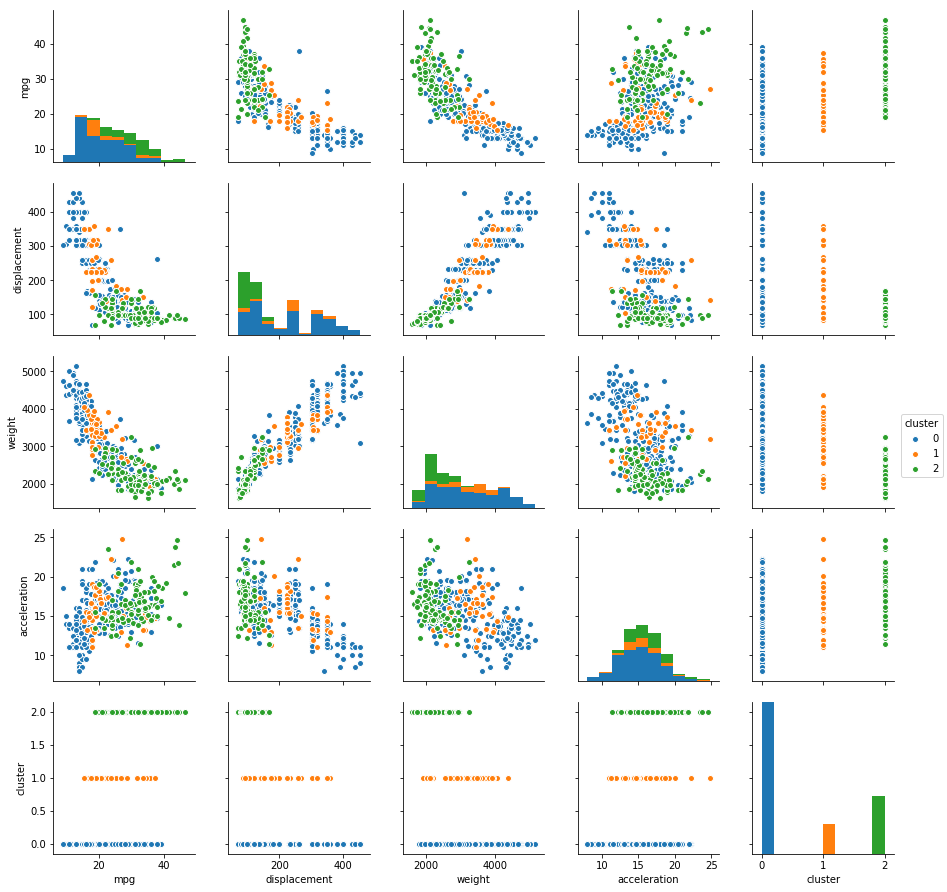

In [41]:
df_untr3 = df2.copy()
df_untr3['cluster'] = df_kmodes['cluster']
sns.pairplot(df_untr3, hue='cluster')
plt.savefig("auto_mpg_pairPlotKmodesUntr.png") 
plt.show()

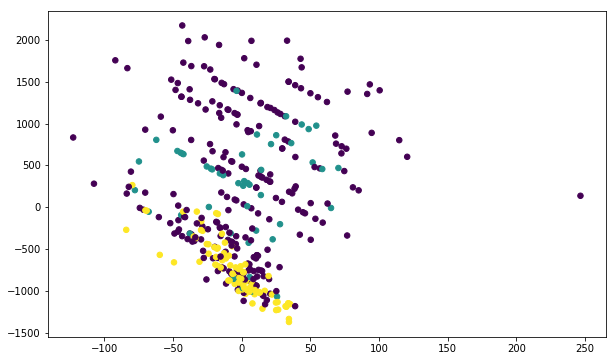

In [42]:
plot_columns = pca.fit_transform(df_untr3)
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_untr3["cluster"], s=30)
plt.savefig("auto_mpg_scatterPCAKmodesUntr.png") 
plt.show()

In [43]:
df_all = df1.copy()
df_all['kmeans'] = df_kmeans['cluster']
df_all['dbscan'] = df_dbs['cluster']
df_all['kmodes'] = df_kmodes['cluster']
df_all.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,origin,carName,kmeans,dbscan,kmodes
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1,0,0


In [99]:
kmeansMat =pd.DataFrame(pd.crosstab(df_all['kmeans'],df_all['cylinders']))
print(kmeansMat)

cylinders  3   4  5   6   8
kmeans                     
0          0  90  1   0   0
1          0   0  0   2  97
2          4  86  0   9   0
3          0  23  2  72   6


In [97]:
dbsMat = pd.DataFrame(pd.crosstab(df_all['dbscan'],df_all['cylinders']))
dbsMat.index = range(dbsMat.shape[0])
print(dbsMat)

cylinders  3    4  5   6   8
0          4   44  2  20  19
1          0    0  0   0  80
2          0  152  0   2   0
3          0    0  0  60   4
4          0    3  1   1   0


In [91]:
kmodesMat = pd.DataFrame(pd.crosstab(df_all['kmodes'],df_all['cylinders']))
print(kmodesMat)

cylinders  3    4  5   6   8
kmodes                      
0          1  102  1  56  89
1          0   12  1  22  14
2          3   85  1   5   0


In [113]:
def f1Score(df):
    F1 = 0
    PR1 = 0
    RC1 = 0
    for i in range(0,df.shape[0]):
        val = float(df.iloc[i,:].max())
        rowSum = df.sum(axis=1)
        PR = val/rowSum[i]
        PR1 = PR1 + PR
        RecallDenom = df[df.iloc[i,:].idxmax(axis=1)].sum()
        RC = val/RecallDenom
        RC1 = RC1 + RC
        F1 = F1 + 2*(PR*RC)/(PR + RC)
    F1 = F1/df.shape[0]
    PR1 = PR1/df.shape[0]
    RC1 = RC1/df.shape[0]
    result = "Precision:" + str(round(PR1,3)) + " Recall:" + str(round(RC1,3)) + " F1 Score:" + str(round(F1,3))
    return(result)  

In [114]:
f1Score(dbsMat)

'Precision:0.804 Recall:0.5 F1 Score:0.577'

In [115]:
f1Score(kmeansMat)

'Precision:0.884 Recall:0.673 F1 Score:0.733'

In [116]:
f1Score(kmodesMat)

'Precision:0.588 Recall:0.402 F1 Score:0.456'